# EDA

<div style='text-align: justify'>
La fase de Análisis Exploratorio de Datos (EDA) es esencial para comprender la información en los archivos ETL GAMES, ITEMS y REVIEWS, utilizando los archivos GAMES.parquet, ITEMS.parquet y REVIEWS.parquet. El objetivo es verificar la calidad y relevancia de los datos, identificar patrones y relaciones para obtener insights valiosos.
</div>

## 1. Importamos las libreras

<div style='text-align: justify'>
Importar las bibliotecas correctas es esencial para un EDA, ya que proporciona acceso a herramientas especializadas que facilitan la manipulación y visualización de datos, lo que mejora la eficiencia y efectividad del análisis.
</div>

In [17]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import warnings
import funciones_basicas as fb
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

## 2. Cargamos los datos

En esta sección nos encargaremos de hacer la carga de todos los archivos .parquet creados hasta el momento con la finalidad de realizar un EDA adecuado, para ello usaremos una función definida anteriormente en el archivo *funciones_basicas.py*

In [18]:
games = fb.cargar_datos_parquet('PARQUET\GAMES.parquet')
reviews = fb.cargar_datos_parquet('PARQUET\REVIEWS.parquet')
items = fb.cargar_datos_parquet('PARQUET\ITEMS.parquet')

In [19]:
games.head(2)

,GENEROS,NOMBRE_JUEGO,PRECIO,ID_GAME,DEVELOPER,AÑO
0,ACTION,LOST SUMMONER KITTY,4.99,761140,KOTOSHIRO,2018
1,FREE TO PLAY,IRONBOUND,26.79,643980,SECRET LEVEL SRL,2018


In [20]:
reviews.head(2)

,ID_USUARIO,AÑO_LANZAMIENTO,ID_GAME,RECOMIENDA,SENTIMIENTO
0,76561197970982479,2011,1250,True,2
1,76561197970982479,2011,22200,True,1


In [21]:
items.head(2)

,ID_GAME,NOMBRE_JUEGO,ID_STEAM,CANT_JUEGOS,ID_USUARIO,HORAS_DE_JUEGO
0,10,COUNTER-STRIKE,76561197970982479,277,76561197970982479,0.10
1,30,DAY OF DEFEAT,76561197970982479,277,76561197970982479,0.12


## 3. Inicio del EDA

En esta sección comenzaremos a realizar las diferentes tareas que nos permitan verificar el comportamiento de los datos, su dstribución y demás información que nos permita comprender a profundidad estos datos.

In [22]:
# Obtener varias métricas y estadísticas de los datos
cantidad_generos = games["GENEROS"].value_counts()
cantidad_juegos = games["ID_GAME"].nunique()
lanzamiento_por_año = games["AÑO"].value_counts().sort_index()
cant_developer = games["DEVELOPER"].value_counts()
cantidad_usuarios = reviews["ID_USUARIO"].nunique()
cant_recomendaciones = reviews["RECOMIENDA"].value_counts()

Encontramos que la cantidad total de los juegos registrados en la base de datos de Steam es de 32132
Estos son los diferentes generos que encontramos según la columna GENEROS
ACTION                       11316
CASUAL                        4340
ADVENTURE                     4328
INDIE                         3299
PENDING                       3282
SIMULATION                    1852
STRATEGY                      1143
RPG                            685
FREE TO PLAY                   523
RACING                         454
DESIGN &AMP; ILLUSTRATION      327
ANIMATION &AMP; MODELING       179
UTILITIES                       93
AUDIO PRODUCTION                84
SPORTS                          63
MASSIVELY MULTIPLAYER           49
EDUCATION                       46
VIDEO PRODUCTION                21
SOFTWARE TRAINING               21
WEB PUBLISHING                   8
PHOTO EDITING                    8
ACCOUNTING                       7
EARLY ACCESS                     4
Name: count, dtype: 

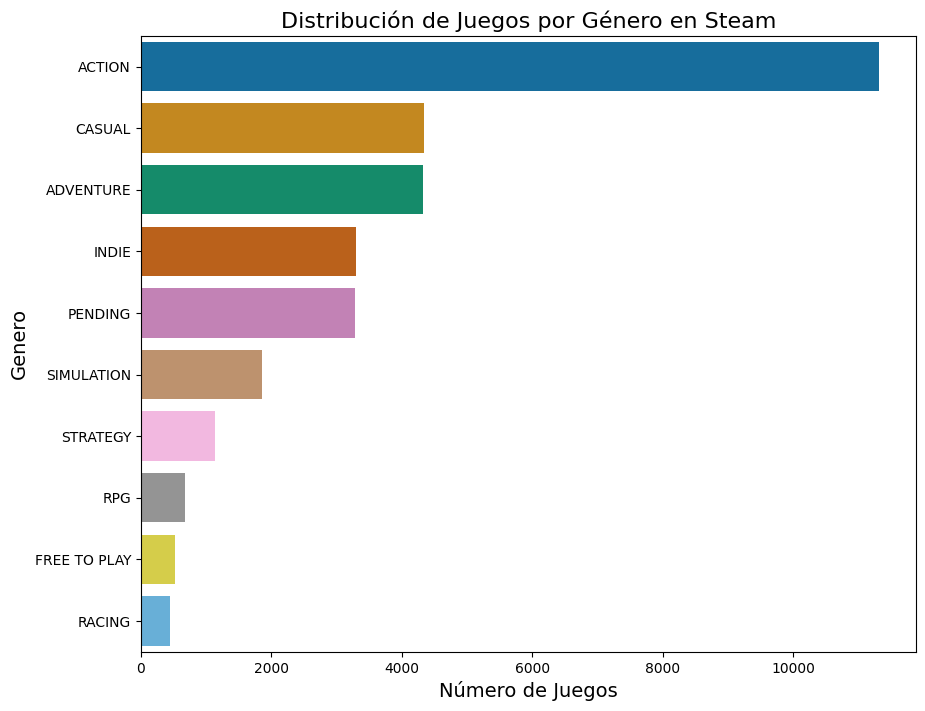

In [23]:
# Verificamos la cantidad de generos y su distribución
print(f'Encontramos que la cantidad total de los juegos registrados en la base de datos de Steam es de {cantidad_juegos}')
print(f'Estos son los diferentes generos que encontramos según la columna {cantidad_generos}')
fb.visualizar_distribucion(games,'GENEROS','Distribución de Juegos por Género en Steam', 'Número de Juegos', 'Genero')

### Análisis de Géneros de Juegos en Steam

El análisis detallado de los diferentes géneros de juegos según la columna "GENEROS" proporciona información valiosa sobre las preferencias de los usuarios en la industria del gaming. A continuación se presenta un resumen de los hallazgos:

- **Acción:** Constituye el género más popular, representando aproximadamente el 40.2% del total de juegos, con un impresionante 11,316 títulos.
- **Casual:** Este género ocupa el segundo lugar, abarcando alrededor del 15.4% del mercado, con 4,340 juegos disponibles.
- **Aventura:** Representa aproximadamente el 15.3% del mercado, con 4,328 títulos, posicionándose como una opción popular para los jugadores.
- **Indie:** Con un 11.7% del mercado, los juegos indie muestran una sólida presencia con 3,299 títulos.
- **Pendiente (Pending):** Esta categoría, con un 11.6% del mercado, tiene 3,282 juegos, lo que sugiere una espera para la aprobación o lanzamiento de estos títulos.
- **Simulación:** Alrededor del 5.5% del mercado está ocupado por juegos de simulación, con 1,852 títulos disponibles.
- **Estrategia:** Con un 3.4% de participación en el mercado, los juegos de estrategia cuentan con 1,143 títulos.
- **RPG (Rol Playing Game):** Representa el 2.1% del mercado, con 685 títulos.
- **Gratis para Jugar (Free to Play):** Aproximadamente el 1.5% del mercado, con 523 títulos disponibles.
- **Carreras (Racing):** Este género tiene alrededor del 1.3% del mercado, con 454 títulos.
- **Diseño e Ilustración (Design & Illustration) y Animación y Modelado (Animation & Modeling):** Ambas categorías representan el 0.9% y el 0.5% del mercado, respectivamente, con 327 y 179 títulos.
- **Utilidades, Producción de Audio, Deportes, y Multijugador Masivo (Massively Multiplayer):** Estos géneros representan menos del 0.5% del mercado cada uno.
- **Educación, Producción de Video, y Entrenamiento de Software:** Cada uno de estos géneros representa aproximadamente el 0.1% del mercado.
- **Publicación Web y Edición de Fotos:** Estas categorías representan menos del 0.1% del mercado.
- **Contabilidad y Acceso Anticipado (Early Access):** Tienen una representación mínima en el mercado, con menos del 0.05% cada uno.

Este análisis revela una diversidad significativa en las preferencias de los jugadores, con géneros populares como acción y casual dominando el mercado, mientras que otros géneros como contabilidad y acceso anticipado tienen una presencia marginal.

### Analisis de Juegos posteados por año

Este conjunto de datos representa el número de juegos lanzados por año desde 1970 hasta 2021. Durante la década de 1970 y principios de la década de 1980, la industria de los videojuegos estaba en sus etapas iniciales, reflejado en los números relativamente bajos de lanzamientos anuales. Sin embargo, a medida que la tecnología avanzaba y la popularidad de los videojuegos crecía, se observa un aumento constante en la cantidad de juegos lanzados por año. Este crecimiento fue especialmente notable a partir de la década de 1990, donde se registraron aumentos significativos año tras año. Por ejemplo, entre 1990 y 1995, hubo un incremento del 227% en el número de lanzamientos.

La explosión de la popularidad de los videojuegos continuó en el nuevo milenio, con un aumento exponencial del 60% entre 2000 y 2005. Sin embargo, se destaca un pico extraordinario en 2015, con un incremento del 168% respecto al año anterior, lo que puede indicar un hito importante en la industria o la influencia de nuevas tecnologías y plataformas.

También es interesante observar las caídas abruptas en 2018 y 2019, con una disminución del 97% y del 94%, respectivamente, lo que puede indicar cambios significativos en el mercado o factores externos que afectaron la producción de juegos durante esos años, como la pandemia. En 2021, se registra un único lanzamiento, lo cual podría ser un error de registro debido al manejado de interpolación de la variable fecha en el ETL del dataframe.

Este análisis evidencia la evolución dinámica de la industria de los videojuegos a lo largo de las décadas, con fluctuaciones significativas en el número de lanzamientos que reflejan los cambios en la demanda del mercado y las tendencias tecnológicas

Ahora queremos verificar la información pertinente de los developer que han contribuido a los juegos dentro de la base de datos DEVELOPER
UBISOFT - SAN FRANCISCO                     1259
SMITEWORKS USA, LLC                          813
DOVETAIL GAMES                               253
KOEI TECMO GAMES CO., LTD.                   232
PARADOX DEVELOPMENT STUDIO                   156
                                            ... 
PIROTEXNIK                                     1
ELVERY333,RAQUEL COVELO SUAREZ,ATOPECODE       1
MNB                                            1
ERRIGAR GAMES                                  1
BIDONIERA GAMES                                1
Name: count, Length: 10940, dtype: int64


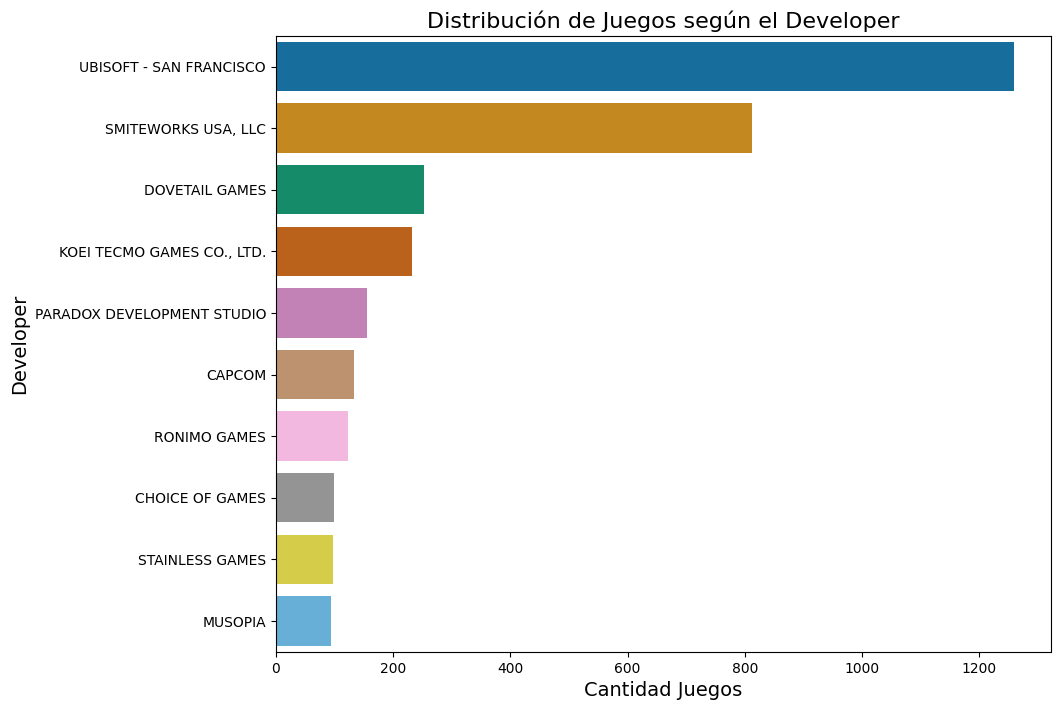

In [24]:
# Encontramos la distribución de los developers 
print(f'Ahora queremos verificar la información pertinente de los developer que han contribuido a los juegos dentro de la base de datos {cant_developer}')
fb.visualizar_distribucion(games, 'DEVELOPER'[0:10], 'Distribución de Juegos según el Developer', 'Cantidad Juegos', 'Developer')

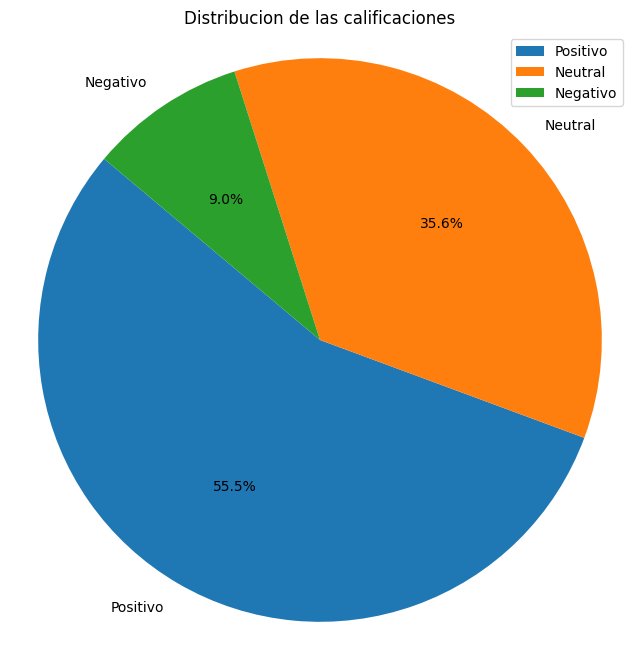

In [25]:
# Visualizamos los datos de los reviews
fb.visualizar_distribucion_circular(reviews, 'SENTIMIENTO', 'Distribucion de las calificaciones')

In [26]:
# Análisis de datos de usuarios y juegos
cant_juegos = items["NOMBRE_JUEGO"].nunique()
juego = items["NOMBRE_JUEGO"].value_counts()
items_contador_usuario = items.groupby('ID_USUARIO')['CANT_JUEGOS'].max().sort_values(ascending=False)
tiempo_contador_usuario = items.groupby('ID_USUARIO')['HORAS_DE_JUEGO'].max().sort_values(ascending=False)

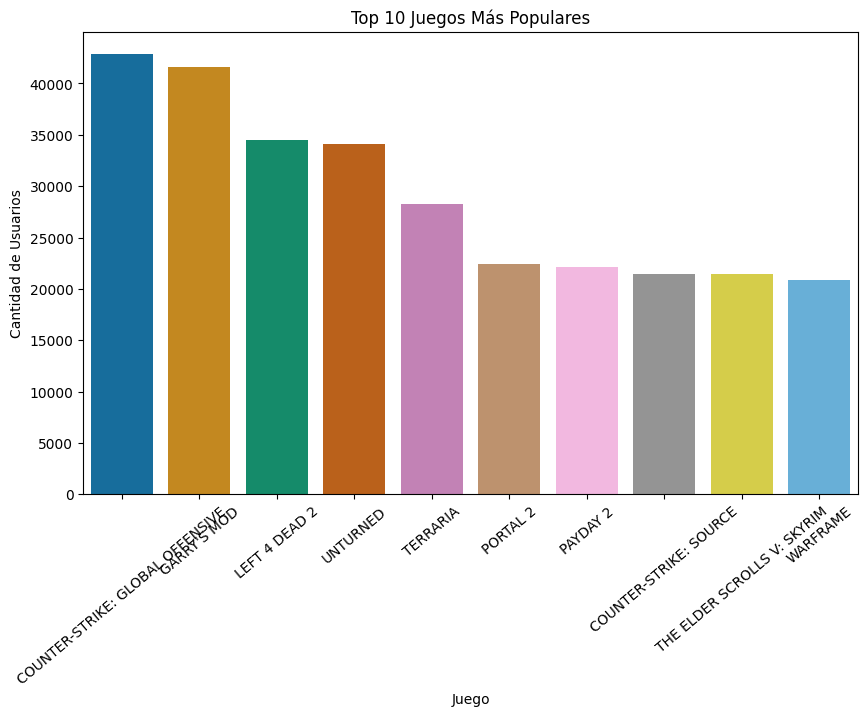

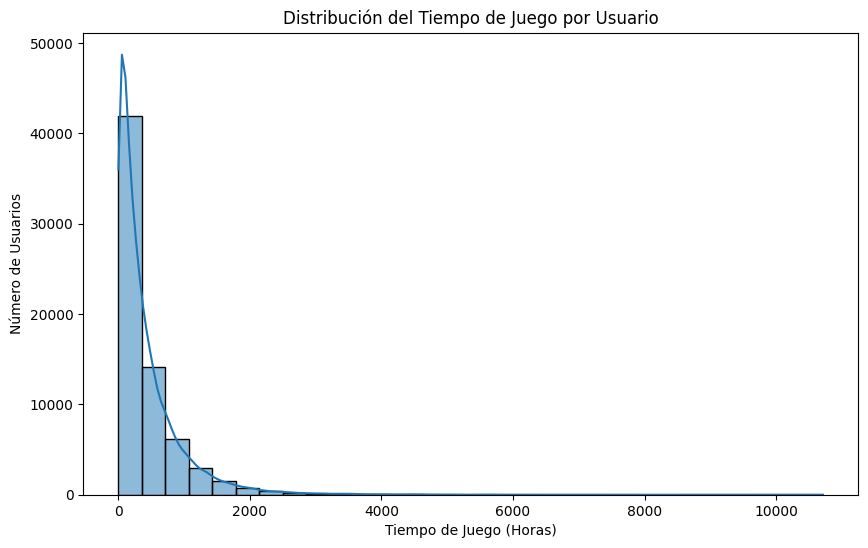

In [27]:
# Visualización de los resultados obtenidos
colors = sns.color_palette("colorblind")

# Gráfica de la cantidad de juegos únicos
plt.figure(figsize=(10, 6))
sns.barplot(x=juego.index[:10], y=juego.values[:10], palette=colors)
plt.title('Top 10 Juegos Más Populares')
plt.xlabel('Juego')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=40)
plt.show()

# Gráfica del tiempo de juego por usuario
plt.figure(figsize=(10, 6))
sns.histplot(tiempo_contador_usuario, bins=30, kde=True, palette=colors)
plt.title('Distribución del Tiempo de Juego por Usuario')
plt.xlabel('Tiempo de Juego (Horas)')
plt.ylabel('Número de Usuarios')
plt.show()

## 4. Creamos el dataset para el Modelo de Recomendación

In [30]:
# Filtrar juegos por año de lanzamiento
games_filtered = games[games['AÑO'].between(2010, 2017, inclusive='both')]

# Filtrar comentarios por año de publicación
reviews_filtered = reviews[reviews['AÑO_LANZAMIENTO'].between(2010, 2017, inclusive='both')]

# Combinar datos de juegos y comentarios
games_reviews = pd.merge(games_filtered, reviews_filtered, left_on='ID_GAME', right_on='ID_GAME')

# Crear el modelo de artículo con las columnas necesarias
modelo_item = games[["ID_GAME", "NOMBRE_JUEGO", "GENEROS"]]

In [31]:
fb.guardar_datos(games_reviews, 'PARQUET\GAMES_REVIEWS.parquet')
fb.guardar_datos(modelo_item, 'PARQUET\MODELO_ITEM.parquet')